<Axes: xlabel='Volume_delta'>

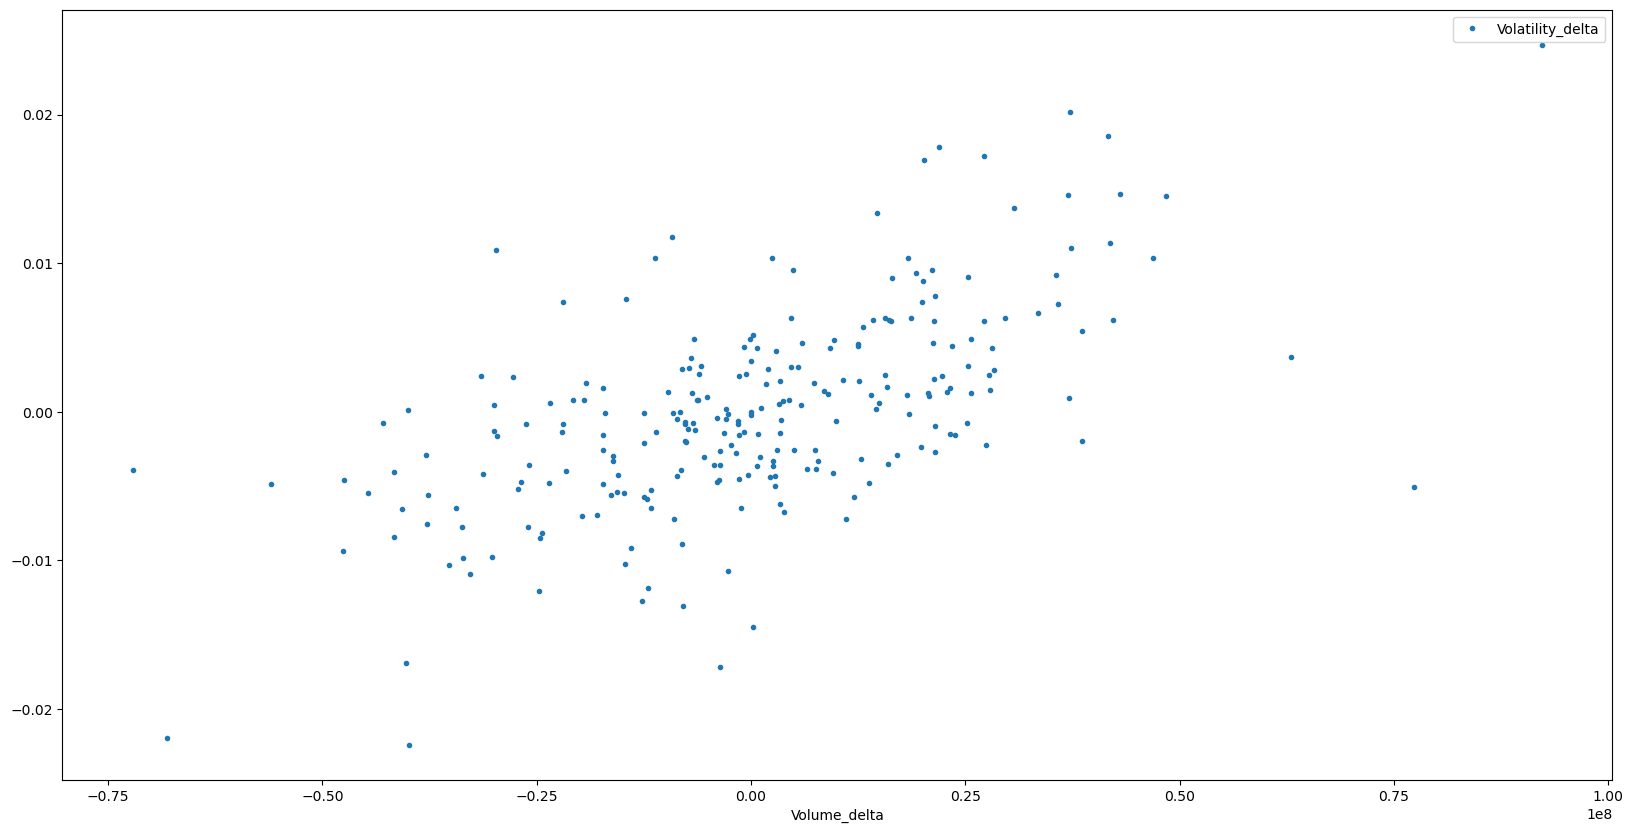

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 10]

def calculate_volatility_and_volume_delta(data):
    data['Volatility'] = (data['High'] - data['Low']) / data['Close']
    data['Volume_delta'] = data['Volume'].diff()
    data['Volatility_delta'] = data['Volatility'].diff()
    
    data['Volume_delta'] = data['Volume_delta'].fillna(0)
    data['Volatility_delta'] = data['Volatility_delta'].fillna(0)

SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPY.csv')

calculate_volatility_and_volume_delta(SPY)

SPY.plot(x='Volume_delta', y='Volatility_delta', style='.')


### Describing relationship between intraday volatility vs volume

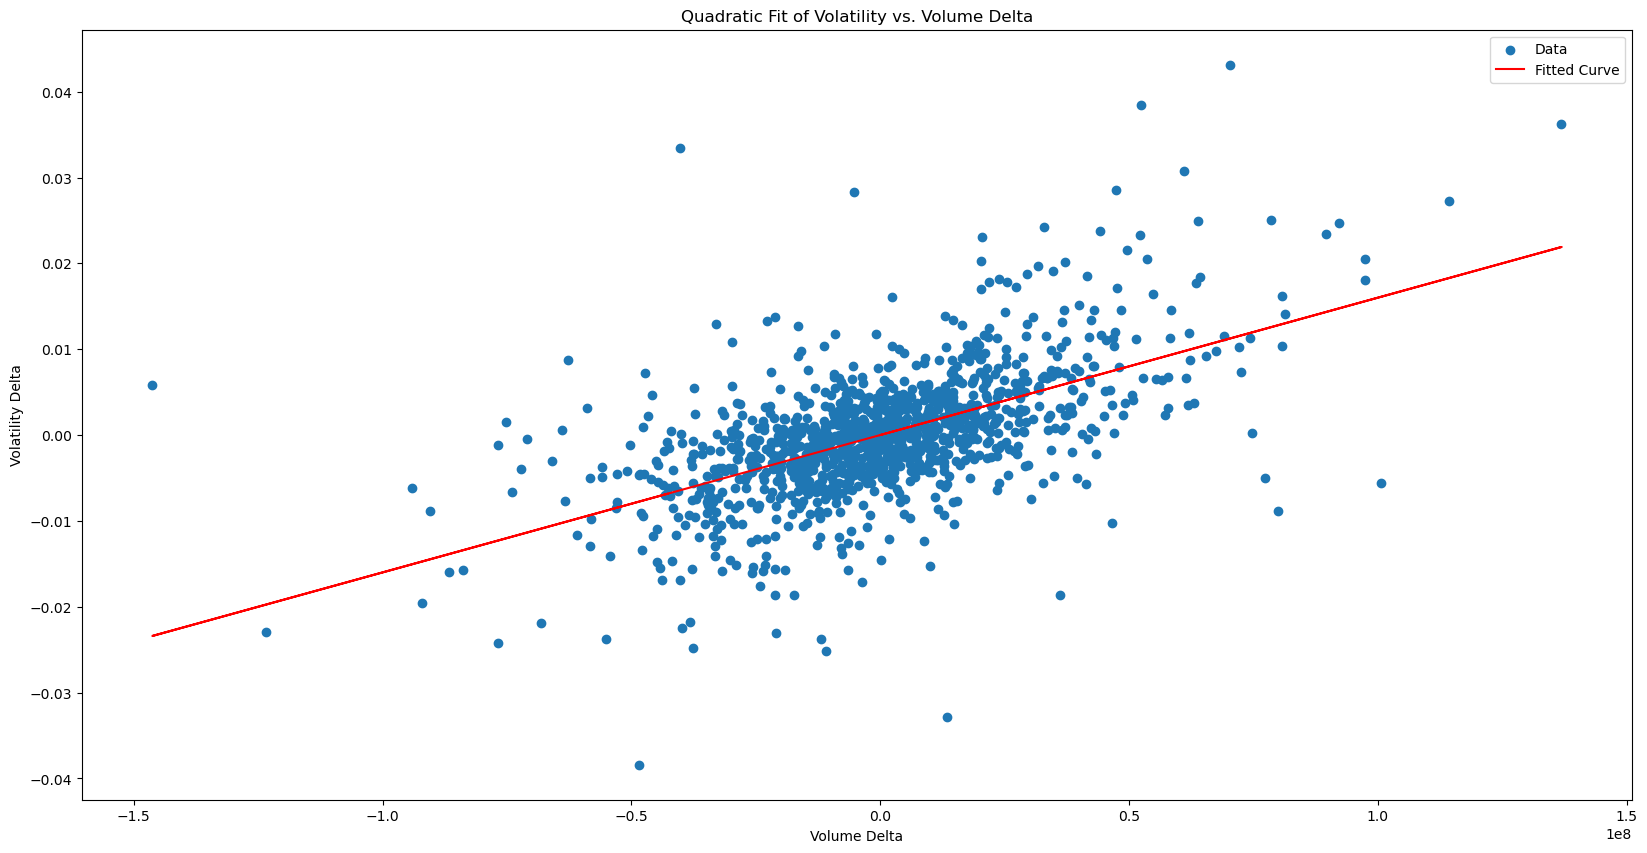

In [8]:
from scipy.optimize import curve_fit

# Define the linear function
def linear_function(x, m, b):
    return m * x + b

# Initial coefficients
initial = [-0.5, -0.25]

# Fit the model to the data
optimal_params, covariance = curve_fit(linear_function, SPY['Volume_delta'], SPY['Volatility_delta'], p0 = initial)

def plot_volume_and_volatility_delta_fitted_curve(data):
    # Predict intraday volatility using the fitted model
    predicted_volatility = linear_function(data['Volume_delta'], *optimal_params)

    # Plot the data and the fitted curve
    plt.scatter(data['Volume_delta'], data['Volatility_delta'], label='Data')
    plt.plot(data['Volume_delta'], predicted_volatility, color='red', label='Fitted Curve')
    plt.xlabel('Volume Delta')
    plt.ylabel('Volatility Delta')
    plt.title('Quadratic Fit of Volatility vs. Volume Delta')
    plt.legend()
    plt.show()
    
plot_volume_and_volatility_delta_fitted_curve(SPY)

### Testing Using the last 5 years data

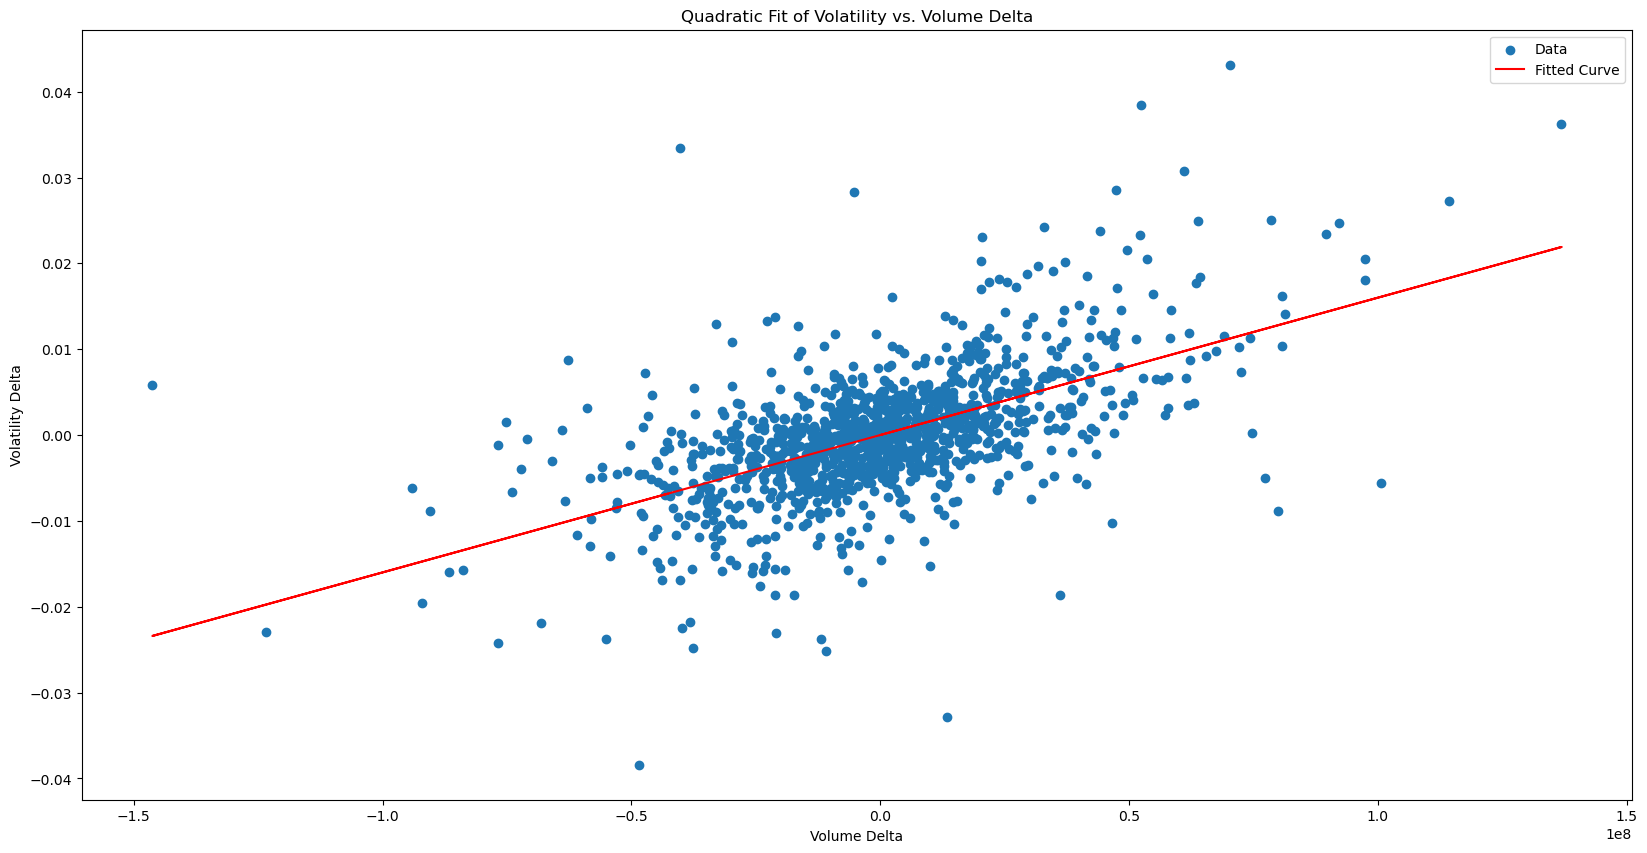

R-squared: 0.3370178817086199


In [9]:
SPY = pd.read_csv('https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPY_5_years.csv')

calculate_volatility_and_volume_delta(SPY)

plot_volume_and_volatility_delta_fitted_curve(SPY)

optimal_params, covariance = curve_fit(linear_function, SPY['Volume_delta'], SPY['Volatility_delta'], p0 = initial)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPY['Volume_delta'], *optimal_params)

# Using R-squared to test how well the data fits
residuals = SPY['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((SPY['Volatility_delta'] - np.mean(SPY['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)

# Researching on SPXS EFT

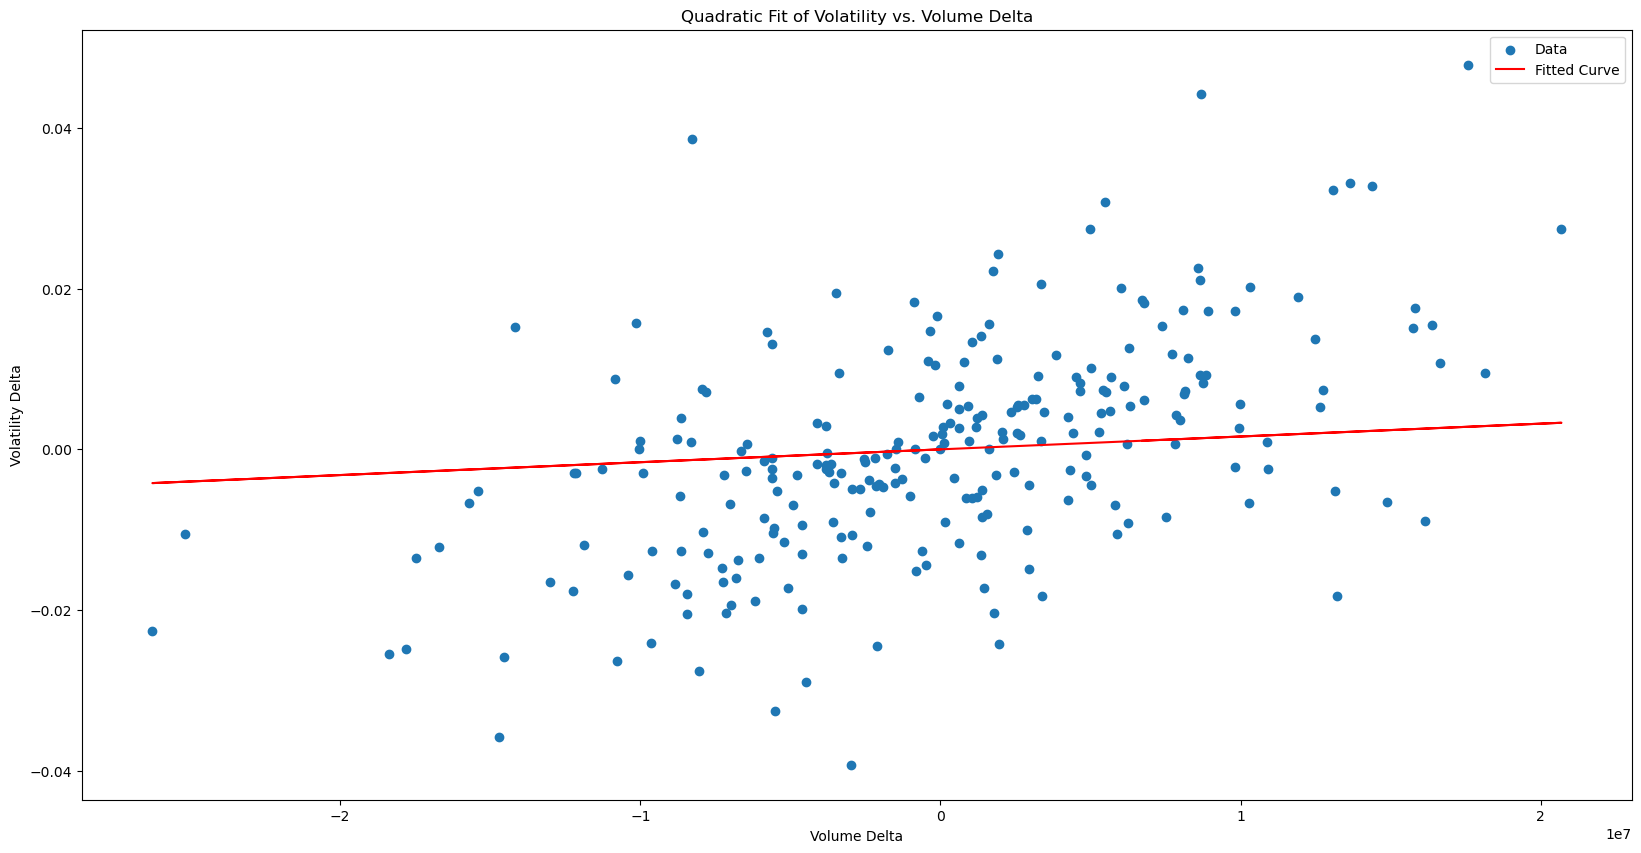

R-squared: 0.28616487374883237


In [10]:
SPXS = pd.read_csv("https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/SPXS.csv")

calculate_volatility_and_volume_delta(SPXS)

plot_volume_and_volatility_delta_fitted_curve(SPXS)

optimal_params, covariance = curve_fit(linear_function, SPXS['Volume_delta'], SPXS['Volatility_delta'], p0 = initial)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(SPXS['Volume_delta'], *optimal_params)

# Using R-squared to test how well the data fits
residuals = SPXS['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((SPXS['Volatility_delta'] - np.mean(SPXS['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)

An R-squared value of 0.2862 implies that about 28.62% of the variation in the dependent variable is foreseeable from the independent variable in the regression model. Because this number is too low, we may conclude that the equation is a worst fit for SPXS EFT.

# Extending research on stocks

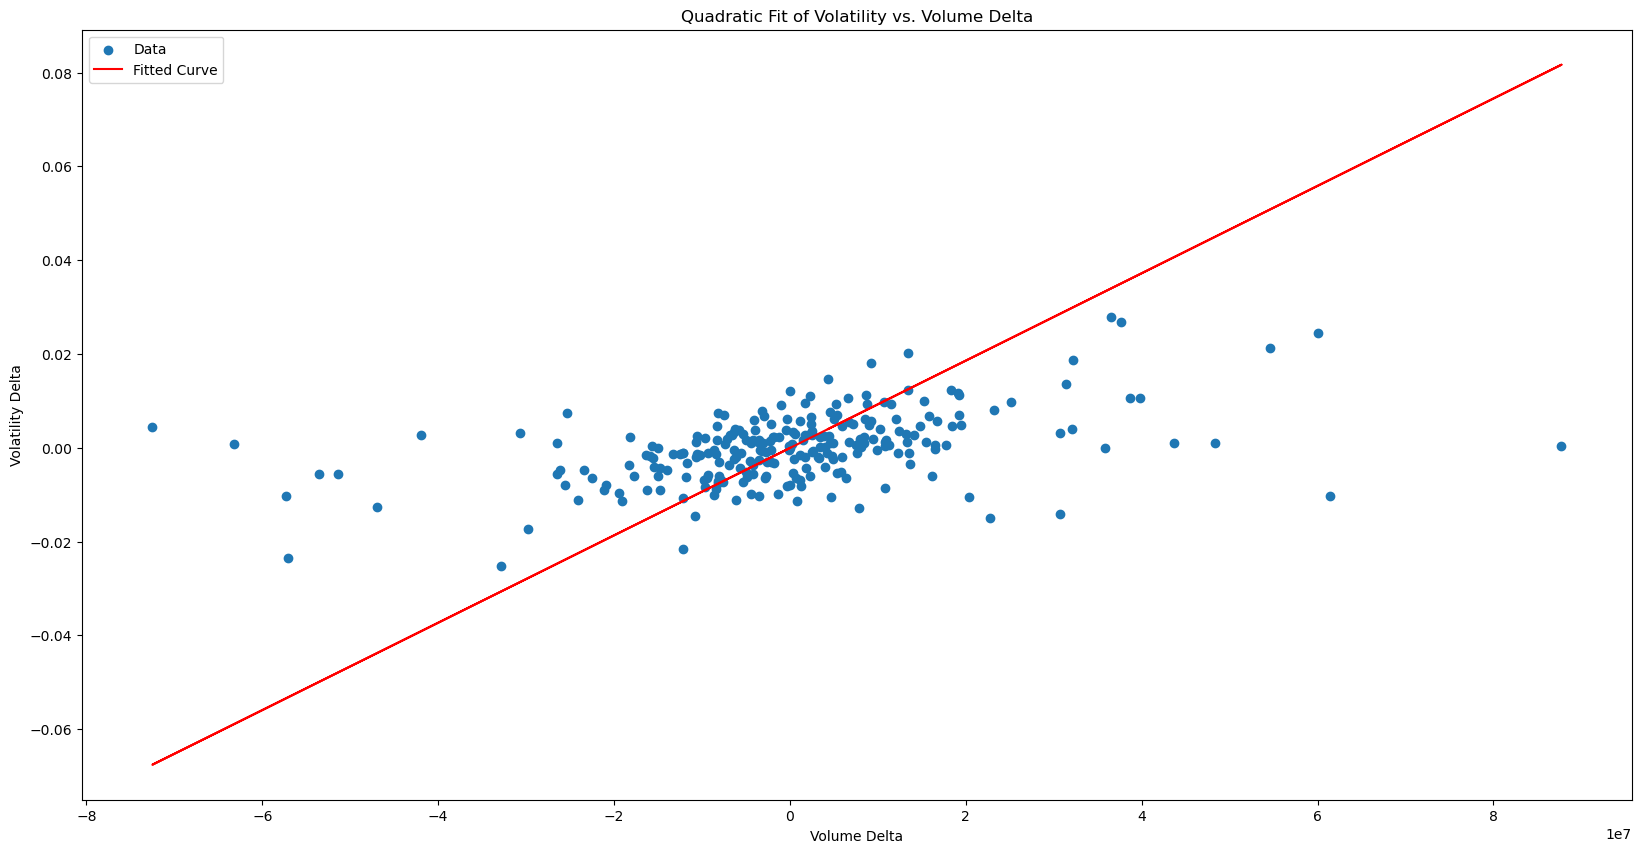

R-squared: 0.20814981918434428


In [11]:
AAPL = pd.read_csv("https://raw.githubusercontent.com/ktxdev/AIM-5003/main/Midterm%20Project/1.%20Data/AAPL.csv")

calculate_volatility_and_volume_delta(AAPL)

plot_volume_and_volatility_delta_fitted_curve(AAPL)

optimal_params, covariance = curve_fit(linear_function, AAPL['Volume_delta'], AAPL['Volatility_delta'], p0 = initial)

# Predict intraday volatility using the fitted model
predicted_volatility = linear_function(AAPL['Volume_delta'], *optimal_params)

# Using R-squared to test how well the data fits
residuals = AAPL['Volatility_delta'] - predicted_volatility
sum_squared_residuals = np.sum(residuals ** 2)
sum_squared_total = np.sum((AAPL['Volatility_delta'] - np.mean(AAPL['Volatility_delta'])) ** 2)
r_squared = 1 - (sum_squared_residuals / sum_squared_total)
print("R-squared:", r_squared)

Although AAPL Stocks have a better R-squared value of 0.2081, which suggests that around 20.81% of the variation in the dependent variable is predictable from the independent variable in the regression model, this figure is too low, we may infer that the equation is a worst fit for AAPL Stocks.

# Conclusion
In conclusion, the equation exhibits low R-squared values, indicating poor fits for both the Stocks and EFTs. These models may not sufficiently explain the variability observed in the dependent variables based on the independent variables used in the regression analysis. Therefore, further investigation or refinement of the models may be necessary to improve their predictive accuracy and usefulness.